In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [2]:
google = pd.read_csv('googleplaystore.csv')

In [14]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [30]:
#1
#посмотрим % пропуска
(google.isna().sum() / 100).round(2)

App                0.00
Category           0.00
Rating            14.74
Reviews            0.00
Size               0.00
Installs           0.00
Type               0.01
Price              0.00
Content Rating     0.01
Genres             0.00
Last Updated       0.00
Current Ver        0.08
Android Ver        0.03
dtype: float64

In [37]:
#1
#Видим, что есть пропуски, в столбце Rating предлагаю заполнить медианой. Снимаем исходное значение

google['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [41]:
google['Rating'] = google['Rating'].fillna(google['Rating'].median())

In [43]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


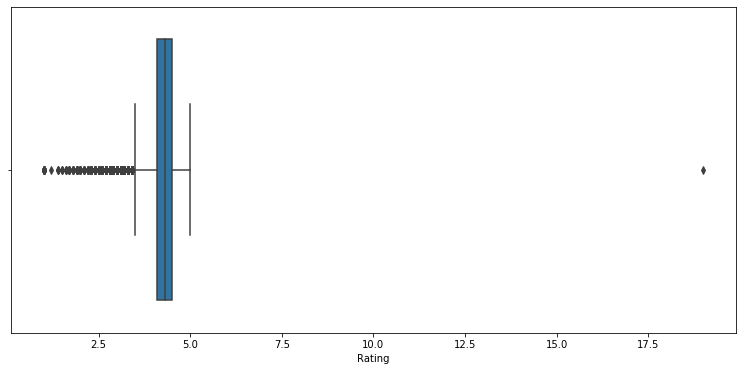

In [62]:
#2
#Посмотрим Выбросы по столбцу Rating, с помощью Box plot
#Видим явный выброс, смотрим на него ниже

sns.boxplot(x=google['Rating'])

In [66]:
#3
#Решаю удалить все выбросы (715 строк), но тут ПОДСКАЖИТЕ НАСКОЛЬКО ВЕРНО УДАЛЯТЬ ИХ ВСЕ??? НАСКОЛЬКО Я ПОНЯЛ МЫ ИХ УДАЛЯЕМ
#ДЛЯ СКАЖЕМ ТАК НОРМАЛЬНОГО РАСПРЕДЕЛЕНИЯ

q1 = google['Rating'].quantile(0.25)
q3 = google['Rating'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
remove_outliers = google[google['Rating'].between(lower_bound,upper_bound,inclusive=True)].sort_values('Rating')


In [70]:
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10107 entries, 10134 to 6494
Data columns (total 13 columns):
App               10107 non-null object
Category          10107 non-null object
Rating            10107 non-null float64
Reviews           10107 non-null object
Size              10107 non-null object
Installs          10107 non-null object
Type              10106 non-null object
Price             10107 non-null object
Content Rating    10107 non-null object
Genres            10107 non-null object
Last Updated      10107 non-null object
Current Ver       10100 non-null object
Android Ver       10105 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [74]:
#4
#проверяем на наличие Дубликатов и видим что их 473 строки - удаляем их.
 
duplicate_rows = remove_outliers[remove_outliers.duplicated()]
duplicate_rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
245,Xero Accounting Software,BUSINESS,3.5,2111,Varies with device,"100,000+",Free,0,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
3160,United Airlines,TRAVEL_AND_LOCAL,3.5,30447,80M,"5,000,000+",Free,0,Everyone,Travel & Local,"July 20, 2018",2.1.56,5.0 and up
604,Free Cam Girls - Live Webcam,DATING,3.5,35,16M,"1,000+",Free,0,Mature 17+,Dating,"July 16, 2018",2.4,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68M,"1,000+",Paid,$33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
1418,MealLogger-Photo Food Journal,HEALTH_AND_FITNESS,3.5,217,9.4M,"50,000+",Free,0,Teen,Health & Fitness,"August 23, 2017",4.6.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,Live Girls Talk - Free Video Chat,DATING,4.8,125,4.7M,"5,000+",Free,0,Mature 17+,Dating,"July 8, 2018",8.2,4.0.3 and up
687,Girls Live Chat - Free Text & Video Chat,DATING,4.8,110,4.9M,"10,000+",Free,0,Mature 17+,Dating,"July 9, 2018",8.2,4.0.3 and up
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2,11M,100+,Free,0,Mature 17+,Medical,"June 6, 2018",1.0.1,4.1 and up
6593,BP Journal - Blood Pressure Diary,MEDICAL,5.0,6,26M,"1,000+",Free,0,Everyone,Medical,"May 25, 2018",1.0.32,4.4 and up


In [76]:
#Удаляем дубликаты

remove_outliers = remove_outliers.drop_duplicates()
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9634 entries, 10134 to 6494
Data columns (total 13 columns):
App               9634 non-null object
Category          9634 non-null object
Rating            9634 non-null float64
Reviews           9634 non-null object
Size              9634 non-null object
Installs          9634 non-null object
Type              9633 non-null object
Price             9634 non-null object
Content Rating    9634 non-null object
Genres            9634 non-null object
Last Updated      9634 non-null object
Current Ver       9627 non-null object
Android Ver       9632 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [79]:
#5
#Заполняем или удаляем остаавшиеся пропуски. РЕШАЮ УДАЛИТЬ СТРОКИ С ПРОПУСКАМИ. 

remove_outliers = remove_outliers.dropna()

In [80]:
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9624 entries, 10134 to 6494
Data columns (total 13 columns):
App               9624 non-null object
Category          9624 non-null object
Rating            9624 non-null float64
Reviews           9624 non-null object
Size              9624 non-null object
Installs          9624 non-null object
Type              9624 non-null object
Price             9624 non-null object
Content Rating    9624 non-null object
Genres            9624 non-null object
Last Updated      9624 non-null object
Current Ver       9624 non-null object
Android Ver       9624 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [82]:
#теперь все данные не имею пропусков. 
#ДУМАЮ, ЧТО МОЖНО СТРОИТЬ ГРАФИКИ И ДЕЛАТЬ СООТВЕТСТВУЮЩИЕ ВЫВОДЫ
(remove_outliers.isna().sum() / 100).round(2)

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

In [111]:
remove_outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10134,EZ File Manager(Root Explorer),PRODUCTIVITY,3.5,626,1.2M,"100,000+",Free,0,Everyone,Productivity,"June 23, 2015",1.1,3.2 and up
2392,GlassesOff,MEDICAL,3.5,1288,38M,"100,000+",Free,0,Everyone,Medical,"July 10, 2018",1.0.0.10,3.0 and up
4667,U-48 Submarine Commander Free,GAME,3.5,4575,3.8M,"500,000+",Free,0,Everyone,Arcade,"October 7, 2017",1.24,4.0.3 and up
10068,Ex Service Taxis,BUSINESS,3.5,15,8.0M,"1,000+",Free,0,Everyone,Business,"October 21, 2015",20.7.9.2,2.3 and up
7820,NetClient CS,BUSINESS,3.5,125,4.3M,"10,000+",Free,0,Everyone,Business,"January 5, 2018",1.2.2,3.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,BI APP,FINANCE,5.0,2,2.7M,100+,Free,0,Everyone,Finance,"February 19, 2016",1.8,4.0 and up
5125,Ag Valley Cooperative,BUSINESS,5.0,6,74M,500+,Free,0,Everyone,Business,"June 26, 2017",2.3,4.0 and up
6807,Jabbla BT,TOOLS,5.0,3,55k,100+,Free,0,Everyone,Tools,"October 6, 2014",1.0,4.2 and up
7147,CB Heroes,SOCIAL,5.0,5,1.8M,5+,Free,0,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up


**Давайте посмотрим с помощью Histogram** количество скачиваний в зависимости от Жанра

Text(0.5, 0, 'Жанр')

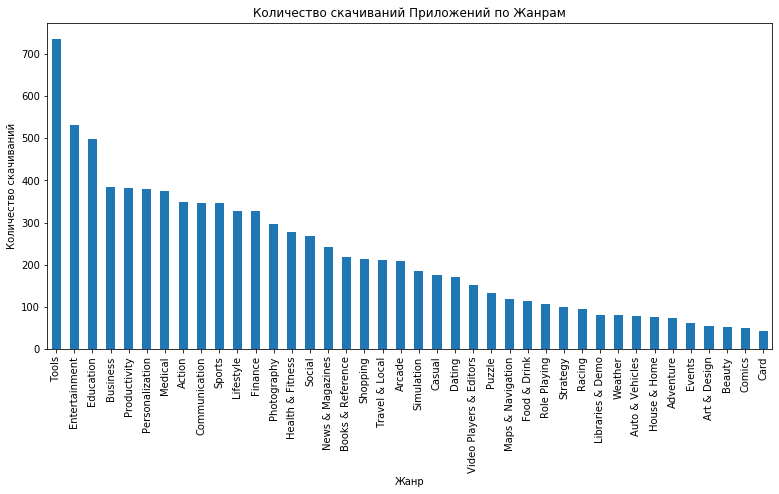

In [85]:
remove_outliers.Genres.value_counts().nlargest(40).plot(kind='bar')
plt.title('Количество скачиваний Приложений по Жанрам')
plt.ylabel('Количество скачиваний')
plt.xlabel('Жанр')

#ВЫВОД - ВИДИМ ЧТО ЖАНР = TOOLS ЯВЛЯЕТСЯ САМЫМ НАИБОЛЕЕ СКАЧИВАЕМЫМ

**Распределение Рейтинга** с помощью Гистограммы

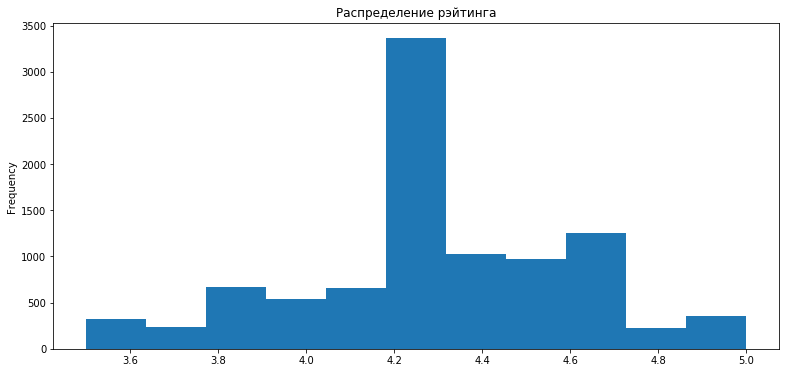

In [97]:
remove_outliers.Rating.plot(kind='hist', 
                               bins=11, 
                               title='Распределение рэйтинга')

#ВЫВОД - ВИДИМ ЧТО ОКОЛО 3500 ПРИЛОЖЕНИЙ ОЦЕНЕНЫ В 4.2 И 4.3 БАЛЛА

**Посмотрим Кол-во Рэйтингов в разрезе Категорий по всем Приложениям с помощью Bar chart**

In [119]:
apps_by_installs = remove_outliers[['Rating','Category']].groupby('Category').count()

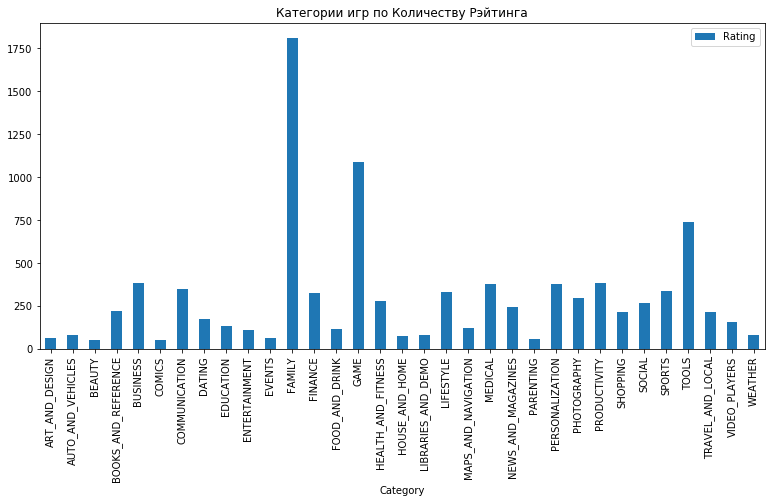

In [121]:
apps_by_installs.plot(kind='bar', title='Категории игр по Количеству Рэйтинга')

#ВЫВОД - наиболее оцениваемая Категория - FAMILY

**Посмотрим на взаимосвязь Кол-во скачиваний и Рэйтинга**, но перед этим столбец Installs необходимо перевести в числовое значение

In [122]:
remove_outliers['Installs'].unique()

array(['100,000+', '500,000+', '1,000+', '10,000+', '100+', '50,000+',
       '50+', '5,000+', '1,000,000+', '10,000,000+', '500+',
       '100,000,000+', '5,000,000+', '10+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '1+', '5+', '0+'], dtype=object)

In [123]:
def convert_to_num(row):
    if row == '100,000+':
        return 100000
    elif row == '500,000+':
        return 500000
    elif row == '1,000+':
        return 1000
    elif row == '10,000+':
        return 10000
    elif row == '100+':
        return 100
    elif row == '50,000+':
        return 50000
    elif row == '50+':
        return 50
    elif row == '5,000+':
        return 5000
    elif row == '1,000,000+':
        return 1000000
    elif row == '10,000,000+':
        return 10000000
    elif row == '500+':
        return 500
    elif row == '100,000,000+':
        return 100000000
    elif row == '5,000,000+':
        return 5000000
    elif row == '10+':
        return 10
    elif row == '50,000,000+':
        return 50000000
    elif row == '1,000,000,000+':
        return 1000000000
    elif row == '500,000,000+':
        return 500000000
    elif row == '1+':
        return 1
    elif row == '5+':
        return 5
    elif row == '0+':
        return 0

In [124]:
remove_outliers['Installs'] = remove_outliers['Installs'].apply(convert_to_num)

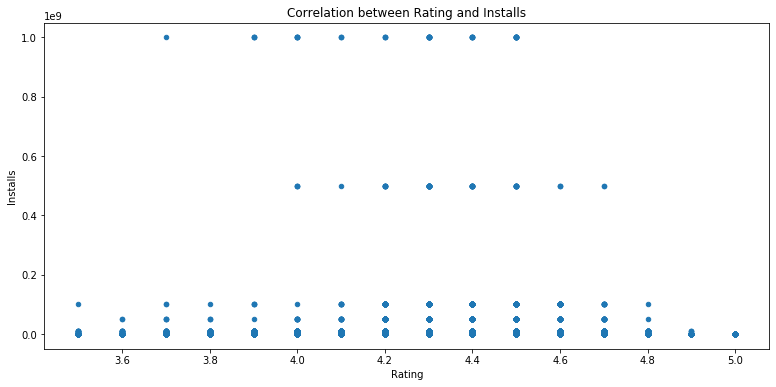

In [131]:
remove_outliers.plot(kind='scatter', 
                     x='Rating', 
                     y='Installs', 
                     title='Correlation between Rating and Installs'
                    )
plt.show()

#ВЫВОД - ЧТО ТО СТРАННЫЙ ГРАФИК НА ВЫХОДЕ, НЕ МОГУ ПОНЯТЬ, ЧТО НЕ ТАК СДЕЛАНО?

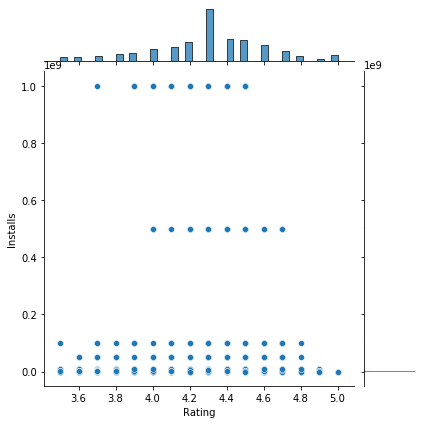

In [134]:
sns.jointplot(x='Rating', y='Installs', data=remove_outliers,kind='scatter')